In [2]:
import pandas as pd

import networkx as nx

In [2]:
df = pd.read_csv('dataset/final_sorted.csv')

In [3]:
df.head()

,from,to,time,utc,post.id,comment.id,parent.id
0,Professional_Feed478,Professional_Feed478,2020-12-01 02:05:52,1606784752,k4a18g,k4a18g,k4a18g
1,Sporklin,Professional_Feed478,2020-12-01 02:24:55,1606785895,k4a18g,ge7onzo,t3_k4a18g
2,shibe5,Professional_Feed478,2020-12-01 02:44:12,1606787052,k4a18g,ge7qspw,t3_k4a18g
3,HubertHamster,HubertHamster,2020-12-01 03:19:57,1606789197,k4bdlt,k4bdlt,k4bdlt
4,AutoModerator,HubertHamster,2020-12-01 03:19:58,1606789198,k4bdlt,ge7usya,t3_k4bdlt


In [4]:
binance = pd.read_csv('dataset/Binance_DOGEUSDT_1h.csv')
binance.head()

,Date,Symbol,Open,High,Low,Close,Volume DOGE,Volume USDT,tradecount
0,2023-10-19 23:00:00,DOGEUSDT,0.05865,0.05890,0.05863,0.05887,12250066.0,7.197851e+05,1872
1,2023-10-19 22:00:00,DOGEUSDT,0.05858,0.05875,0.05857,0.05865,8809389.0,5.168053e+05,1359
2,2023-10-19 21:00:00,DOGEUSDT,0.05873,0.05877,0.05855,0.05858,15152955.0,8.885734e+05,2018
3,2023-10-19 20:00:00,DOGEUSDT,0.05866,0.05899,0.05854,0.05872,27370557.0,1.607658e+06,3333
4,2023-10-19 19:00:00,DOGEUSDT,0.05852,0.05870,0.05849,0.05867,3577543.0,2.097033e+05,857


In [6]:
# number of unique users
n_users = pd.concat([df['from'], df['to']]).nunique()
print("Unique users:", n_users)

# number of posts vs comments
n_posts = (df['post.id'] == df['comment.id']).sum()
n_comments = (df['post.id'] != df['comment.id']).sum()

print("Posts:", n_posts)
print("Comments:", n_comments)

# self-posts (new threads)
self_posts = (df['from'] == df['to']).sum()
print("Thread-starting posts:", self_posts)

Unique users: 420799
Posts: 608519
Comments: 2721816
Thread-starting posts: 671692


In [8]:

# directed graph: from -> to
G = nx.DiGraph()

for _, row in df.iterrows():
    if row['from'] != row['to']:  # exclude self-posts
        if G.has_edge(row['from'], row['to']):
            G[row['from']][row['to']]['weight'] += 1
        else:
            G.add_edge(row['from'], row['to'], weight=1)

print("Nodes:", G.number_of_nodes())
print("Edges:", G.number_of_edges())

Nodes: 389931
Edges: 2306266


In [11]:

import pickle

with open("user_interaction_network.pkl", "wb") as f:
    pickle.dump(G, f)

In [3]:
import pickle

with open("user_interaction_network.pkl", "rb") as f:
    G = pickle.load(f)

In [13]:
G

In [14]:
# degree centrality
deg_cent = nx.degree_centrality(G)

# betweenness centrality (sample if graph is large)
bet_cent = nx.betweenness_centrality(G, k=100, seed=42)

# show top users
top_deg = sorted(deg_cent.items(), key=lambda x: x[1], reverse=True)[:10]
top_bet = sorted(bet_cent.items(), key=lambda x: x[1], reverse=True)[:10]

print("Top degree centrality:", top_deg)
print("Top betweenness centrality:", top_bet)

Top degree centrality: [('42points', 0.03947118713615264), ('awsomeguy1123', 0.03752981304336676), ('AutoModerator', 0.03223655527915267), ('iUsedToCallDogeDodge', 0.016667094093811712), ('DODGECOINPSU', 0.015166824814710333), ('dongnyoung1', 0.013463955068858514), ('Fulvio55', 0.013115174518503322), ('TheBeesDick', 0.012381709537609316), ('dogebrothers', 0.01210217218475111), ('Acrobatic-Maximum-36', 0.011653373682455826)]
Top betweenness centrality: [('42points', 0.025842753035473565), ('Fulvio55', 0.022983112803450258), ('AutoModerator', 0.019419918696047006), ('awsomeguy1123', 0.01661695877044361), ('FlavorFresh', 0.011556194865724862), ('Matrickpahomes54mvp', 0.010441465152471104), ('popcity_peep', 0.009254207671402876), ('DODGECOINPSU', 0.00831780718207607), ('iUsedToCallDogeDodge', 0.00796892287530327), ('Thehedgeclipper', 0.007512393200532991)]


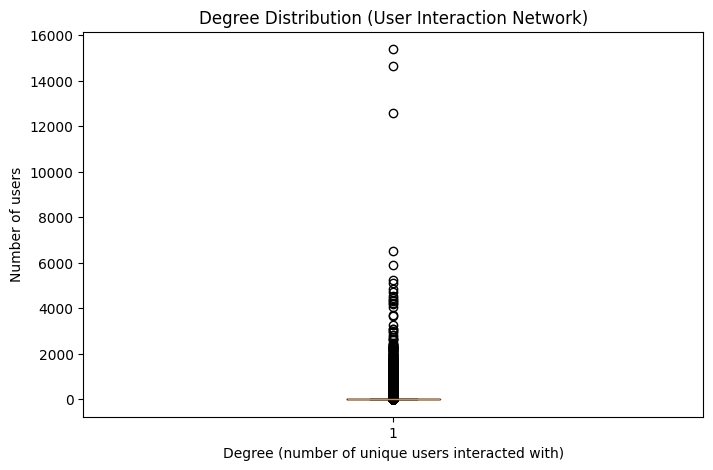

In [20]:
import matplotlib.pyplot as plt
import networkx as nx

# Compute degree for all nodes (sum of in-degree + out-degree for directed networks)
degrees = [deg for node, deg in G.degree()]

# Plot histogram (linear scale)
plt.figure(figsize=(8,5))
plt.boxplot(degrees)
plt.title("Degree Distribution (User Interaction Network)")
plt.xlabel("Degree (number of unique users interacted with)")
plt.ylabel("Number of users")
plt.show()

In [21]:
import numpy as np
np.median(degrees)

np.float64(2.0)

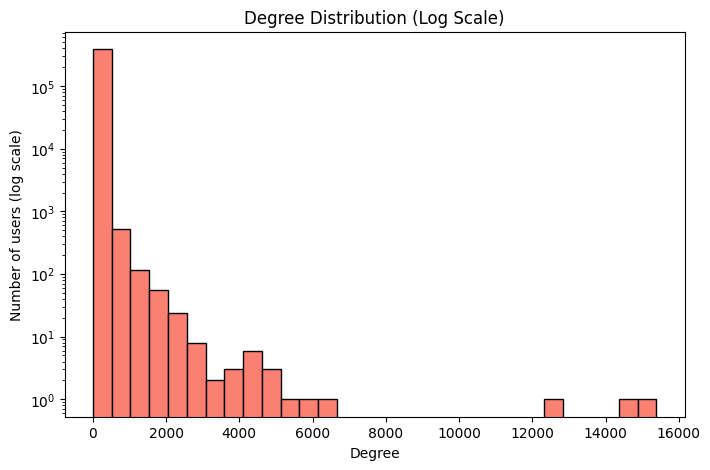

In [22]:
import numpy as np

plt.figure(figsize=(8,5))
plt.hist(degrees, bins=30, color='salmon', edgecolor='black', log=True)
plt.title("Degree Distribution (Log Scale)")
plt.xlabel("Degree")
plt.ylabel("Number of users (log scale)")
plt.show()

In [23]:
top_degrees = sorted(G.degree(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 users by degree:")
for user, deg in top_degrees:
    print(user, deg)

Top 10 users by degree:
42points 15391
awsomeguy1123 14634
AutoModerator 12570
iUsedToCallDogeDodge 6499
DODGECOINPSU 5914
dongnyoung1 5250
Fulvio55 5114
TheBeesDick 4828
dogebrothers 4719
Acrobatic-Maximum-36 4544


In [4]:
import community as community_louvain  # Louvain library for NetworkX

# Run Louvain community detection
partition = community_louvain.best_partition(G.to_undirected())  # undirected for Louvain

# Number of communities
num_communities = len(set(partition.values()))
print("Detected communities:", num_communities)

# Example: count nodes per community
from collections import Counter
community_sizes = Counter(partition.values())
print("Community sizes (top 10):", community_sizes.most_common(10))

Detected communities: 1613
Community sizes (top 10): [(1, 104668), (2, 79693), (5, 72979), (4, 34038), (3, 26451), (8, 17696), (19, 16971), (7, 16408), (0, 5344), (16, 2115)]


# Seperate Moderators and Bots
# 